<a href="https://colab.research.google.com/github/ryanhassell/DBMS/blob/main/HW3/HW3_Ryan_Hassell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ryan Hassell

For importing the data into MySQL, I first imported it into Google Sheets and added the column names in a row above the first data instance. This allowed me to save the sheets as .csv files so I could import them into MySQL.

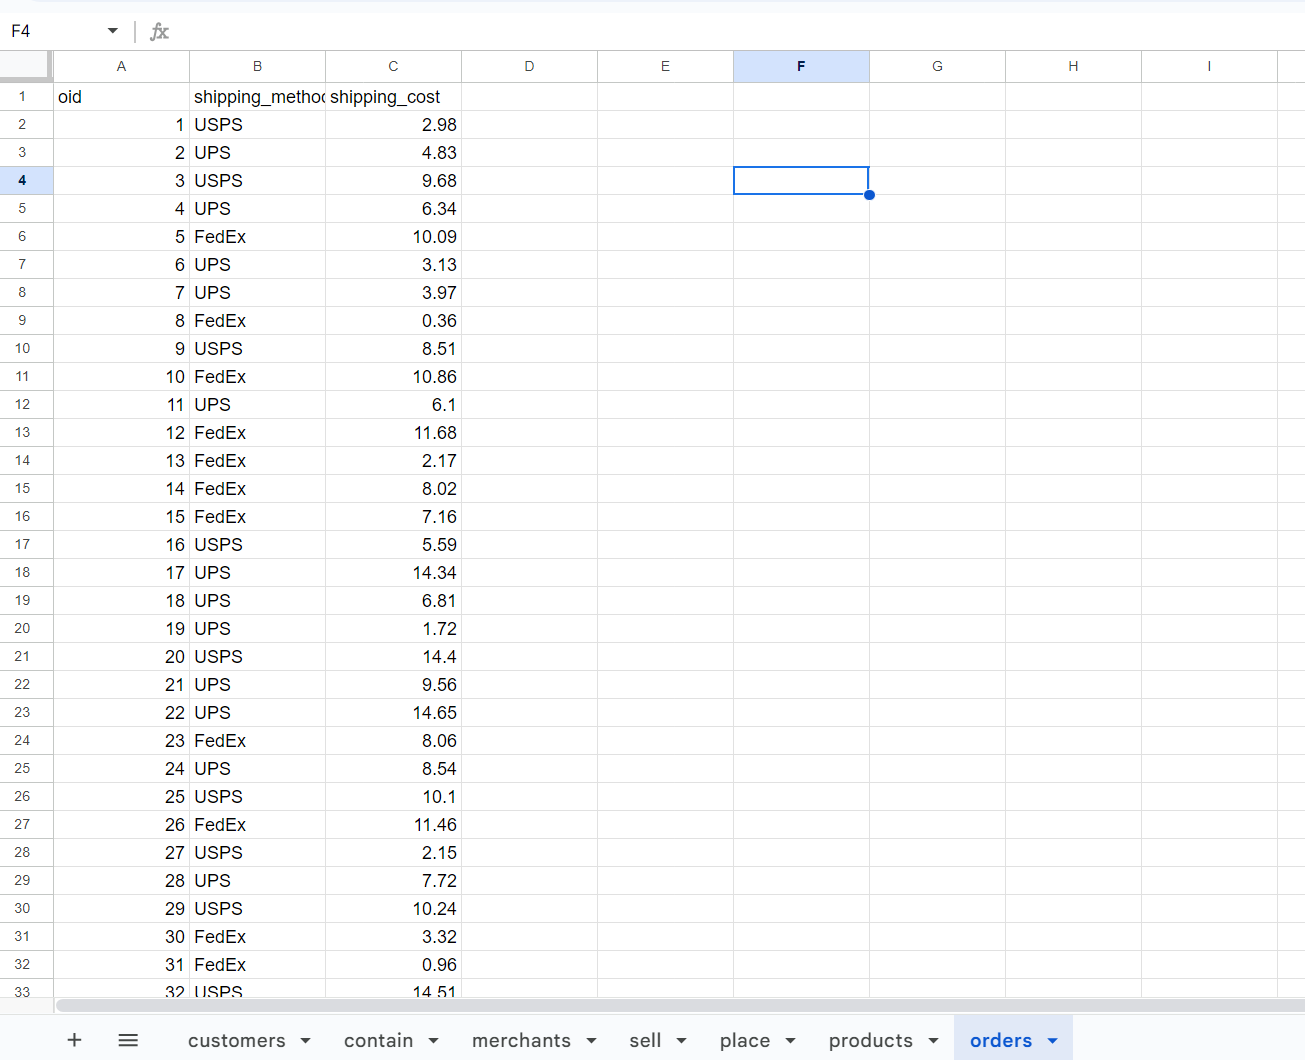

After fixing up the data, I imported it into MySQL.

# Question 1

### List names and sellers of products that are no longer available (quantity=0)
In order to list the names and sellers of products no longer available, I ran the query:


```
SELECT products.name AS product_name, merchants.name AS seller_name
FROM products
INNER JOIN sell ON products.pid = sell.pid
INNER JOIN merchants ON sell.mid = merchants.mid
WHERE sell.quantity_available = 0;
```

This is what was returned back to me:

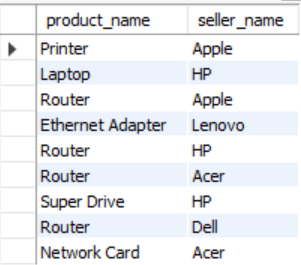



# Question 2

### List names and descriptions of products that are not sold.

To list the name and descriptions of products that aren't sold, I used the query:


```
SELECT products.name AS product_name, products.description
FROM products
LEFT JOIN sell ON products.pid = sell.pid
WHERE sell.pid IS NULL;
```
This is what I got:

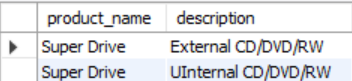

# Question 3

###How many customers bought SATA drives but not any routers?
This is the query I used to find out how many people bought SATA drives, but no routers:


```
SELECT customers.fullname AS name
FROM customers
INNER JOIN place ON customers.cid = place.cid
INNER JOIN orders ON place.oid = orders.oid
INNER JOIN contain ON orders.oid = contain.oid
INNER JOIN products ON contain.pid = products.pid
WHERE (products.pid = 4 OR products.pid = 5)
  AND customers.cid NOT IN (
    SELECT DISTINCT customers.cid
    FROM customers
    INNER JOIN place ON customers.cid = place.cid
    INNER JOIN orders ON place.oid = orders.oid
    INNER JOIN contain ON orders.oid = contain.oid
    INNER JOIN products ON contain.pid = products.pid
    WHERE (products.name = 'Router')
);
```
I did not get any names back, meaning that everyone who bought a SATA drive bought a router. (or that anyone who bought a router didn't buy SATA drives.)

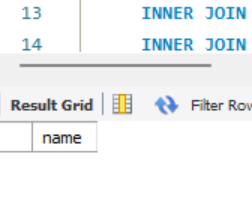

# Question 4

### HP has a 20% sale on all its Networking products.
To find out the prices of HP's networking products after a 20% sale, I ran the query:


```
SELECT products.name AS product_name, sell.price AS original_price, (sell.price * 0.8) AS discounted_price
FROM sell
INNER JOIN products ON sell.pid = products.pid
WHERE sell.mid = (SELECT mid FROM merchants WHERE name = 'HP')
  AND products.category = 'Networking';
```
I wasn't sure if I had to actually update the variables, so I did not, and I chose to display them in a different "discounted_price" column.

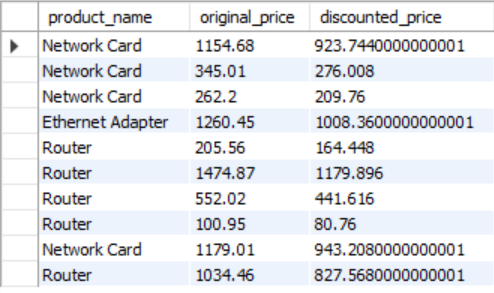


# Question 5

### What did Uriel Whitney order from Acer? (make sure to at least retrieve product names and prices).
In order to determine what Uriel Whitney ordeed from Acer, I used this query:


```
SELECT DISTINCT customers.fullname AS customer_name, products.name AS product_name, sell.price
FROM customers
INNER JOIN place ON customers.cid = place.cid
INNER JOIN orders ON place.oid = orders.oid
INNER JOIN contain ON orders.oid = contain.oid
INNER JOIN products ON contain.pid = products.pid
INNER JOIN sell ON products.pid = sell.pid
INNER JOIN merchants ON sell.mid = merchants.mid
WHERE customers.fullname = 'Uriel Whitney' AND merchants.name = 'Acer';
```
According to the result, Uriel Whitney bought 27 items. (Without DISTINCT, Uriel bought 89)

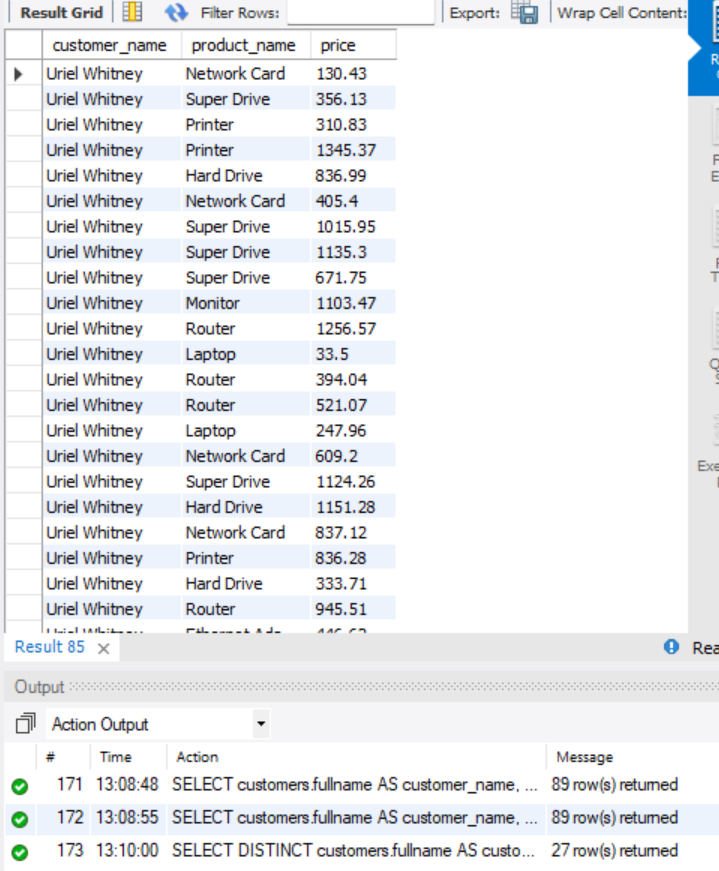

# Question 6


### List the annual total sales for each company (sort the results along the company and the year attributes).
I used this query to list companies and their revenues (per year)
```
SELECT YEAR(order_date) AS year, merchants.name AS company, SUM(sell.price * sell.quantity_available) AS total_revenue
FROM place
JOIN orders ON place.oid = orders.oid
JOIN contain ON place.oid = contain.oid
JOIN sell ON contain.pid = sell.pid
JOIN merchants ON sell.mid = merchants.mid
GROUP BY YEAR(order_date), merchants.name
ORDER BY YEAR(order_date) DESC;

```
Here is (part) of the table I got back. (I couldn't fit the full thing into one screenshot)

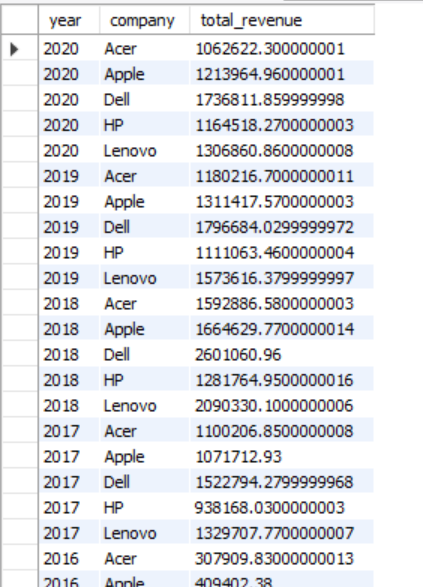


# Question 7

### Which company had the highest annual revenue and in what year?
I just changed up the query I used for #6 a bit:

```
SELECT YEAR(order_date) AS year, merchants.name AS company, SUM(sell.price * sell.quantity_available) AS total_revenue
FROM place
JOIN orders ON place.oid = orders.oid
JOIN contain ON place.oid = contain.oid
JOIN sell ON contain.pid = sell.pid
JOIN merchants ON sell.mid = merchants.mid
GROUP BY YEAR(order_date), merchants.name
ORDER BY total_revenue DESC
LIMIT 1;
```
And I got Dell in 2018 as my answer:

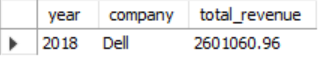

# Question 8

### On average, what was the cheapest shipping method used ever?

This is the query I used to find the average lowest shipping cost:

```
SELECT AVG(lowest_shipping_cost) AS average_lowest_shipping_cost
FROM (
    SELECT MIN(orders.shipping_cost) AS lowest_shipping_cost
    FROM orders
    GROUP BY orders.oid
) AS lowest_shipping_methods;
```

This is the average I got back:

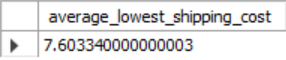

# Question 9

### What is the best sold ($) category for each company?

This is the query I used to find the best sold category for each company:
```
WITH totalSales AS (
    SELECT merchants.name AS company, products.category, SUM(sell.price * sell.quantity_available) AS total_sales
    FROM sell
    JOIN products ON sell.pid = products.pid
    JOIN merchants ON sell.mid = merchants.mid
    GROUP BY merchants.name, products.category
)
SELECT totalSales.company, totalSales.category, totalSales.total_sales
FROM totalSales
JOIN (
    SELECT company, MAX(total_sales) AS max_sales
    FROM totalSales
    GROUP BY company
) max_sales_per_company ON totalSales.company = max_sales_per_company.company AND totalSales.total_sales = max_sales_per_company.max_sales;
```
From the table returned, I can assume that Peripherals are the best selling category for each company.

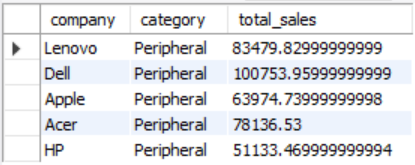

# Question 10

### For each company find out which customers have spent the most and the least amounts.
For this question, I used the query


```
WITH customerleastmost AS (
    SELECT merchants.name AS company,
           customers.fullname AS customer_name,
           SUM(sell.price * sell.quantity_available) AS total_spent
    FROM place
    JOIN orders ON place.oid = orders.oid
    JOIN contain ON place.oid = contain.oid
    JOIN sell ON contain.pid = sell.pid
    JOIN merchants ON sell.mid = merchants.mid
    JOIN customers ON place.cid = customers.cid
    GROUP BY merchants.name, customers.fullname
)
SELECT customer1.company, customer1.customer_name, customer1.total_spent
FROM customerleastmost customer1
JOIN (
    SELECT company,
           MAX(total_spent) AS max_spent,
           MIN(total_spent) AS min_spent
    FROM customerleastmost
    GROUP BY company
) customer2
ON customer1.company = customer2.company AND (customer1.total_spent = customer2.max_spent OR customer1.total_spent = customer2.min_spent)
ORDER BY company, total_spent DESC;
```

The "ORDER BY" statement at the end of the query orders the companies by name, with the highest spending customer first.This is the table I got from the query:

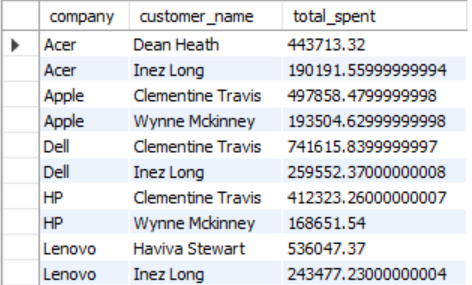

